<a href="https://colab.research.google.com/github/rogemaro/Data-With-Python-And-Pandas/blob/main/8_Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/db"
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19_data.csv  Meteorite_Landings.csv  test.csv  test.json	   test.pkl
london_merged.csv  poblacion.csv	   test.hdf  test.parquet  test.xlsx


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("covid_19_data.csv")
df.sample(10)
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"]) #cambiamos el formato de string a fecha

In [ ]:
list(df) #mostramos una lista de las columnas que contiene el data frame

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [ ]:
df = df[["ObservationDate",
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']] #Seleccionamos solo las columnas que nos interesan y las guardamos en nuestro data frame

In [ ]:
df.sample(5)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
2990,2020-03-02,Iraq,26.0,0.0,0.0
1344,2020-02-13,Mainland China,1145.0,0.0,360.0
2233,2020-02-24,Taiwan,30.0,1.0,5.0
1965,2020-02-21,Mainland China,132.0,0.0,78.0
2876,2020-03-01,Netherlands,10.0,0.0,0.0


In [ ]:
df_time = df.groupby(["ObservationDate"]).sum() #creamos un nuevo data frame con el grupo fecha 
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [ ]:
df1 = df_time["Confirmed"].iloc[10:15] #vamos a tomar una muestra desde el indice 10 al 15
df2 = df_time["Deaths"].iloc[12:17]

In [ ]:
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
df1-df2 #al tener a la fecha como indice, va a restar las filas por los indices coincidientes, en este caso resta confirmados menos muertes, para tener en número de sobrevivientes

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [ ]:
df.tail(10)

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
3385,2020-03-04,US,1.0,0.0,0.0
3386,2020-03-04,US,1.0,0.0,0.0
3387,2020-03-04,US,1.0,0.0,1.0
3388,2020-03-04,US,1.0,0.0,0.0
3389,2020-03-04,US,1.0,0.0,0.0
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0
3394,2020-03-04,US,0.0,0.0,0.0


In [ ]:
df_time.diff() #Nos muestra la diferencia de una fila frente a la anterior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [ ]:
df_time.diff().mean() #nos muestra el promedio de casos de un dia con respecto al siguiente

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [ ]:
df_diff = df_time.diff() #guardamos el nuevo data frame

Debido a que el nuevo data frame contiene un dato faltante en la primera fila, debemos de completarlo, para ello lo extraemos del dataframe original, a través de un diccionario

In [ ]:
df_time.head(1).to_dict() 

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [ ]:
df_diff = df_diff.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0})

In [ ]:
df_diff.head(10)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
2020-01-27,809.0,26.0,9.0
2020-01-28,2651.0,49.0,46.0
2020-01-29,587.0,2.0,19.0
2020-01-30,2070.0,38.0,17.0


In [ ]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [ ]:
df_diff.resample("7D").sum() #le indicamos que haga una clasificación cada 7 días y los sume

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12429.0,452.0,20324.0
2020-03-04,2280.0,94.0,2942.0


In [ ]:
df_diff.resample("W-Sun").sum() #realiza la suma de domingo a domingo

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,2118.0,56.0,52.0
2020-02-02,14669.0,306.0,420.0
2020-02-09,23364.0,544.0,2772.0
2020-02-16,31075.0,864.0,7621.0
2020-02-23,7759.0,699.0,12529.0
2020-03-01,9386.0,527.0,19322.0
2020-03-08,6753.0,258.0,8455.0


In [ ]:
df_diff.resample("M").sum() #resultados mes a mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [ ]:
df_diff.resample("M").count() #hace un conteo de observaciones mes a mes

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


# **Cómo trabajar las variables nulas y tratamiento de las series de tiempo**

In [ ]:
df_diff.resample("12h").sum() #tomamos los resultados cada 12 horas, sin embargo no existen esos registros, por lo tanto por defecto aparecerá 0

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,0.0,0.0,0.0
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [ ]:
df_diff.resample("12h").mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [ ]:
df_diff.resample("12h").sum(min_count = 1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-03-02 00:00:00,1938.0,89.0,2886.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,2535.0,75.0,2627.0


In [ ]:
df_cum = df_time.resample("12h").sum(min_count = 1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


Vamos a completar los valores nulos

In [ ]:
df_cum.fillna(-100) #completamos los valores nulos con -100

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-100.0,-100.0,-100.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-100.0,-100.0,-100.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,-100.0,-100.0,-100.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [ ]:
df_cum = df_cum.interpolate() #va a rellenar interpolando los valores medios
df_cum.head(12)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
2020-01-24 12:00:00,1189.5,34.0,37.5
2020-01-25 00:00:00,1438.0,42.0,39.0
2020-01-25 12:00:00,1778.0,49.0,45.5
2020-01-26 00:00:00,2118.0,56.0,52.0


In [ ]:
df_cum["rate"] = 1 - df_cum["Deaths"]/df_cum["Confirmed"] #creamos una nueva columna con la tasa de superviviencia


In [ ]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964


In [ ]:
df_cum = df_cum.reset_index() #reseteamos el indice

In [ ]:
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


Contemplamos el caso en el que la variable tipo tiempo no funge como indice

In [ ]:
df_cum.groupby(pd.Grouper(key = "ObservationDate", freq = "M"))[["rate"]].mean() #agrupamos por indice de fecha 

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


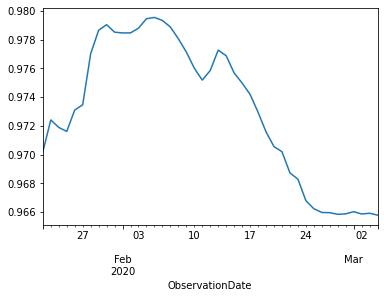

In [ ]:
sr = df_cum.groupby(pd.Grouper(key= "ObservationDate", freq = "1D"))["rate"].mean()
sr.plot()

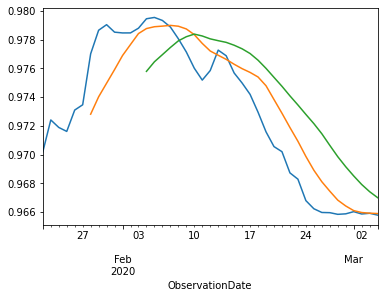

In [ ]:
sr.plot()
sr.rolling(window=7).mean().plot() #realizamos la serie con promedio de ventanas de 7 dias
sr.rolling(window=14).mean().plot()

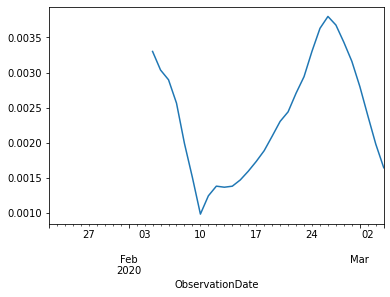

In [ ]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()